In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import json
import os
import sys
sys.path.append("../../src")
from Evaluation import plot_accuracies_bar_plot, plot_accuracies_scatter_plot

In [25]:
path_reports = "../../results/without_augmentation"

In [26]:
path_train_individual_models = os.path.join(path_reports, 'train__MLP_FCN_Resnet_MCDCNN_Encoder_Time_CNN_11_datasets.csv')

In [57]:
path_train_MCDCNN_improved = os.path.join(path_reports, '../train__MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_10_datasets.csv')

In [27]:
path_train_encoder10 = os.path.join(path_reports, 'test_Encoder10.csv')
path_train_fcn10 = os.path.join(path_reports, 'test_FCN10.csv')
path_train_mlp10 = os.path.join(path_reports, 'test_MLP10.csv')
path_train_nne10 = os.path.join(path_reports, 'test_NNE.csv')
path_train_resnet10 = os.path.join(path_reports, 'test_Resnet10.csv')
path_train_all_models = os.path.join(path_reports, 'all_ensembles_without_augmentation.csv')

In [28]:
df_train_encoder10 = pd.read_csv(path_train_encoder10)
df_train_fcn10 =pd.read_csv(path_train_fcn10)
df_train_mlp10 =pd.read_csv(path_train_mlp10)
df_train_nne10 =pd.read_csv(path_train_nne10)
df_train_resnet10 = pd.read_csv(path_train_resnet10)
df_train_all_ensembles = pd.concat([df_train_encoder10, df_train_fcn10, df_train_mlp10, df_train_nne10, df_train_resnet10])

In [252]:
path_train_all_models

'../../results/without_augmentation/all_ensembles_without_augmentation.csv'

In [29]:
df_train_all_ensembles = pd.read_csv(path_train_all_models)

In [66]:
df_mcdcnn_improved_individual_models = pd.read_csv(path_train_MCDCNN_improved)
df_mcdcnn_improved_individual_models = df_mcdcnn_improved_individual_models[df_mcdcnn_improved_individual_models["model_name"] == "MCDCNN_improved-0"]
df_mcdcnn_improved_individual_models["model_name"] = "MCDCNN_improved"

In [30]:
df_train_individual_models = pd.read_csv(path_train_individual_models)

In [70]:
df_train_individual_models = pd.concat([df_train_individual_models, df_mcdcnn_improved_individual_models])

In [71]:
df_train_all_ensembles = df_train_all_ensembles[df_train_all_ensembles["dataset_name"] != "fifty_words"]
df_train_individual_models = df_train_individual_models[df_train_individual_models["dataset_name"] != "fifty_words"]

In [86]:
df_train_individual_models["model_name"].unique()

array(['MLP', 'FCN', 'Resnet', 'MCDCNN', 'Encoder', 'Time_CNN',
       'MCDCNN_improved'], dtype=object)

In [94]:
df_train_individual_models_mean = df_train_individual_models\
                                        .groupby(['model_name',], as_index=False)\
                                        .mean()[['model_name', 'test_acc']]
df_train_individual_models_mean = df_train_individual_models_mean\
                                        .drop(df_train_individual_models_mean[\
                                                (df_train_individual_models_mean['model_name'] == 'MCDCNN') |\
                                               (df_train_individual_models_mean['model_name'] == 'Time_CNN')].index)
df_train_individual_models_mean["ensemble"] = False
df_train_all_ensembles_mean = df_train_all_ensembles.groupby(['model_name',], as_index=False).mean()[['model_name', 'test_acc']]
df_train_all_ensembles_mean["ensemble"] = True
df_train_all_ensembles_mean = pd.concat([df_train_individual_models_mean, df_train_all_ensembles_mean], ignore_index=True)\
                                .sort_values(by=['test_acc'], ascending=False)\
                                .rename(columns={"test_acc": "avg_test_acc"})

/scratch/slurm_tmpdir/job_21782299/ipykernel_3135324/2717106207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train_individual_models_mean = df_train_individual_models\
/scratch/slurm_tmpdir/job_21782299/ipykernel_3135324/2717106207.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train_all_ensembles_mean = df_train_all_ensembles.groupby(['model_name',], as_index=False).mean()[['model_name', 'test_acc']]


In [95]:
df_train_individual_models_mean

,model_name,test_acc,ensemble
0,Encoder,0.844542,False
1,FCN,0.677509,False
3,MCDCNN_improved,0.685522,False
4,MLP,0.806805,False
5,Resnet,0.734801,False


In [96]:
df_train_all_ensembles_mean

,model_name,avg_test_acc,ensemble
14,Best4-majority_vote,0.871228,True
36,NNE-average_with_confidence,0.870533,True
13,Best4-logistic_average_with_confidence,0.866928,True
38,NNE-logistic_average_with_confidence,0.865624,True
35,NNE-average,0.865306,True
12,Best4-logistic_average,0.865207,True
10,Best4-average,0.865095,True
37,NNE-logistic_average,0.864661,True
6,All-average_with_confidence,0.864281,True
11,Best4-average_with_confidence,0.862901,True


In [111]:
df_compare_encoder = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("Encoder")].reset_index(drop=True)
df_compare_fcn = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("FCN")].reset_index(drop=True)
df_compare_resnet = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("Resnet")].reset_index(drop=True)
df_compare_nne = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("NNE")].reset_index(drop=True)
df_compare_all = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("All")].reset_index(drop=True)
df_compare_best4 = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("Best4")].reset_index(drop=True)
df_compare_mlp = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("MLP")].reset_index(drop=True)
df_compare_mcdcnn_improved = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("MCDCNN")].reset_index(drop=True)

In [103]:
df_compare_fcn

,model_name,avg_test_acc,ensemble
0,FCN,0.677509,False
1,FCN10-majority_vote,0.674980,True
2,FCN10-logistic_average_with_confidence,0.668740,True
3,FCN10-average,0.668606,True
4,FCN10-logistic_average,0.668459,True
5,FCN10-average_with_confidence,0.660013,True


In [104]:
def choose_model_and_best_ensemble(df):
    res = df[(df["model_name"] == df[df["ensemble"]].iloc[df['avg_test_acc'].idxmax()]['model_name']) |\
            (df["ensemble"] == False)]
    return res

In [112]:
df_best_ensemble_and_individual_model = choose_model_and_best_ensemble(df_compare_encoder)
for df in [df_compare_fcn, df_compare_resnet, df_compare_nne, df_compare_mlp, df_compare_mcdcnn_improved, df_compare_all, df_compare_best4]:
    df_prepared = choose_model_and_best_ensemble(df)
    df_best_ensemble_and_individual_model = pd.concat([df_best_ensemble_and_individual_model, df_prepared], ignore_index=True)
df_best_ensemble_and_individual_model = df_best_ensemble_and_individual_model.sort_values(by=['avg_test_acc'], ascending=False)

# Visualise comparison of individual models with the best ensemble model

In [113]:
df_best_ensemble_and_individual_model

,model_name,avg_test_acc,ensemble
12,Best4-majority_vote,0.871228,True
6,NNE-average_with_confidence,0.870533,True
11,All-average_with_confidence,0.864281,True
0,Encoder10-majority_vote,0.859971,True
1,Encoder,0.844542,False
7,MLP10-average,0.832027,True
8,MLP,0.806805,False
4,Resnet10-logistic_average,0.804021,True
5,Resnet,0.734801,False
9,MCDCNN_improved10-majority_vote,0.692646,True


In [202]:
def plot_accuracies_scatter_plot(df, title='Test accuracies'):
    sns.set(rc={"grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    fig, ax = plt.subplots()
    #plt.ylim(1)
    sns.scatterplot(data=df, s=100, x="avg_test_acc", y="model_name",)\
        .set(title=title)

In [282]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.3f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.3f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [283]:
def plot_accuracies_bar_plot(df, title='Test accuracies', figsize=(8,6)):
    sns.set(rc={"grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    plt.figure(figsize = figsize)
    plt.xlim(0, 1)
    splot = sns.barplot(data=df, x="avg_test_acc", y="model_name", palette=sns.color_palette("Spectral", len(df)))
    splot.set(title=title)
    show_values(splot, "h", space=0)

In [302]:
def plot_accuracies_bar_plot_with_hue(df, title='Test accuracies', figsize=(10,20)):
    sns.set(rc={"grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    plt.figure(figsize = figsize)
    plt.xlim(0, 1)
    splot = sns.barplot(data=df, x="avg_test_acc", y="model_name",hue ="train_on_augmented_data" , palette=sns.color_palette("Spectral"))
    splot.set(title=title)
    show_values(splot, "h", space=0)

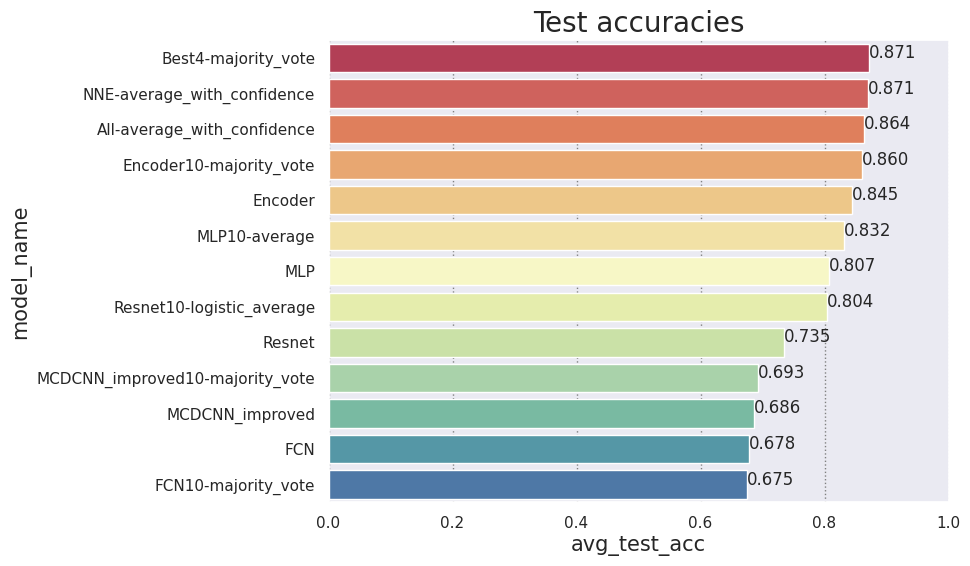

In [303]:
plot_accuracies_bar_plot(df_best_ensemble_and_individual_model)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

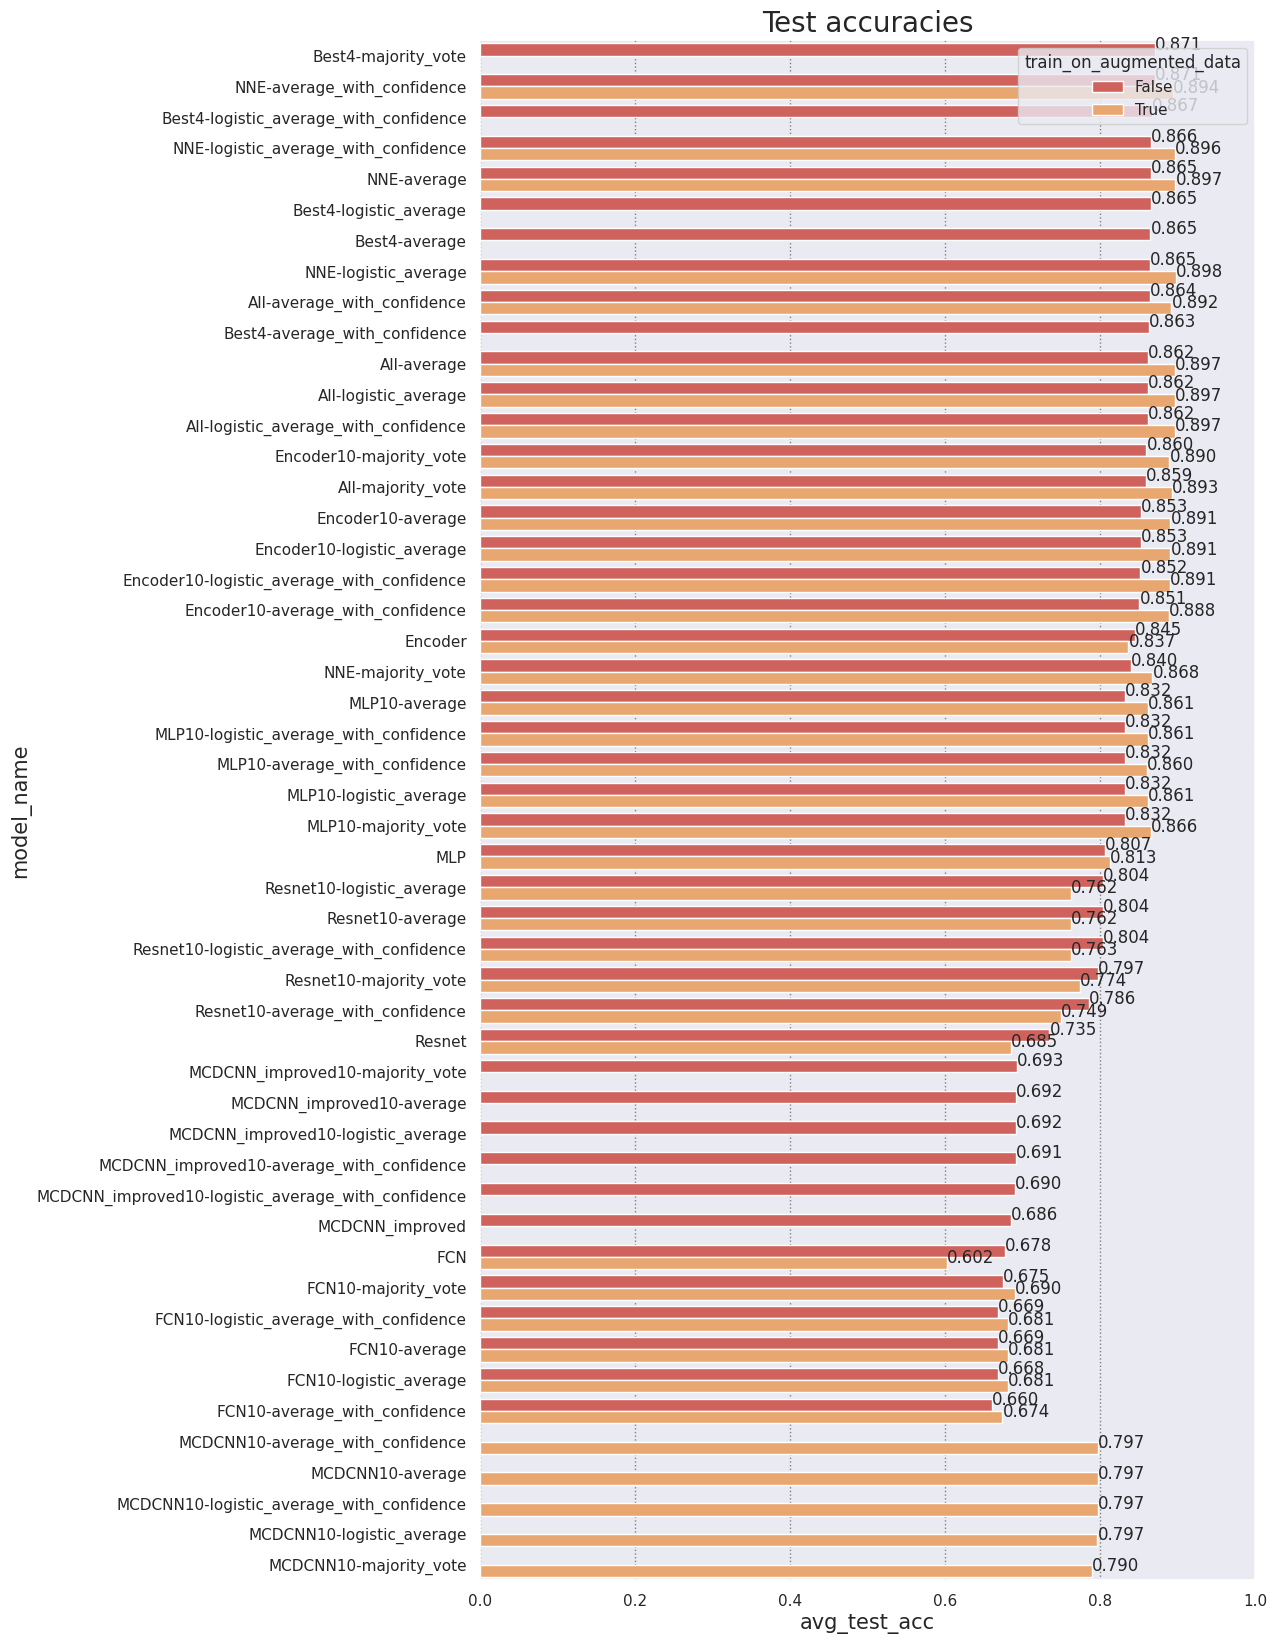

In [304]:
df_train_all_ensembles_mean_augmented = pd.read_csv('train_all_ensembles_mean_augumented_data.csv')
df_train_all_ensembles_mean_2 = df_train_all_ensembles_mean.copy()
df_train_all_ensembles_mean_2["train_on_augmented_data"] = False
df_train_all_ensembles_with_augmented = pd.concat([df_train_all_ensembles_mean_2,df_train_all_ensembles_mean_augmented])
plot_accuracies_bar_plot_with_hue(df_train_all_ensembles_with_augmented)

In [305]:
max(list(df_train_all_ensembles_mean_2.set_index("model_name")["avg_test_acc"]\
.subtract(df_train_all_ensembles_with_augmented.set_index("model_name")["avg_test_acc"])))

0.07542957663536076

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


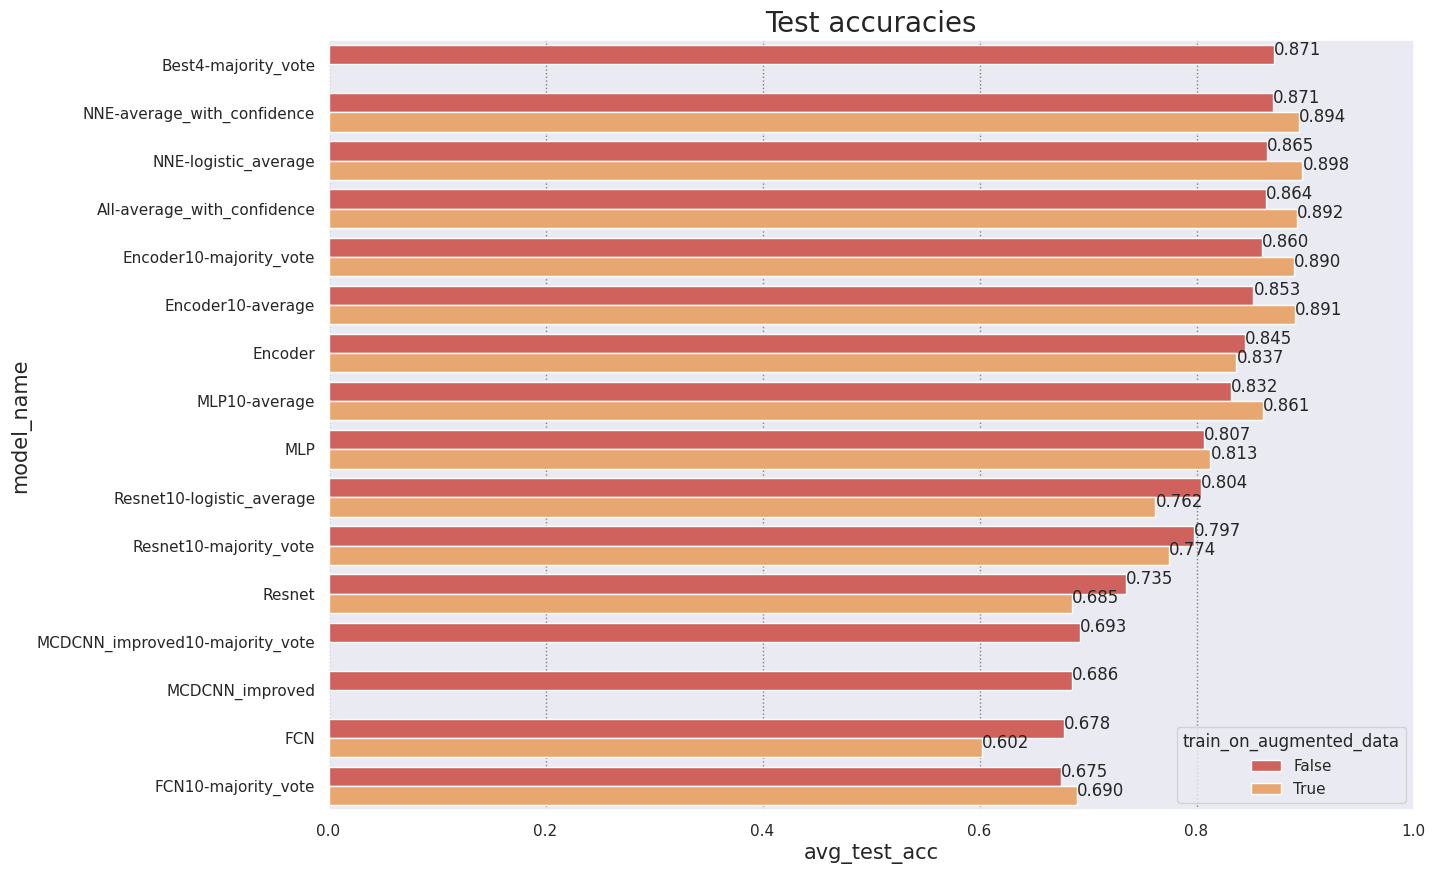

In [314]:
df_best_ensemble_and_individual_model_augmented = pd.read_csv('best_ensemble_and_individual_model_augumented_data.csv')
df_best_ensemble_and_individual_model_2 = df_best_ensemble_and_individual_model.copy()
df_best_ensemble_and_individual_model_2["train_on_augmented_data"] = False
df_best_ensemble_and_individual_model_with_augmented = pd.concat([df_best_ensemble_and_individual_model_2,df_best_ensemble_and_individual_model_augmented])

model_to_display = list(df_best_ensemble_and_individual_model_with_augmented["model_name"])
df_best_ensemble_and_individual_model_with_augmented_to_display = \
    df_train_all_ensembles_with_augmented[df_train_all_ensembles_with_augmented["model_name"].isin(model_to_display)]
plot_accuracies_bar_plot_with_hue(df_best_ensemble_and_individual_model_with_augmented_to_display, figsize=(14,10))

In [312]:
df_best_ensemble_and_individual_model_2

,model_name,avg_test_acc,ensemble,train_on_augmented_data
12,Best4-majority_vote,0.871228,True,False
6,NNE-average_with_confidence,0.870533,True,False
11,All-average_with_confidence,0.864281,True,False
0,Encoder10-majority_vote,0.859971,True,False
1,Encoder,0.844542,False,False
7,MLP10-average,0.832027,True,False
8,MLP,0.806805,False,False
4,Resnet10-logistic_average,0.804021,True,False
5,Resnet,0.734801,False,False
9,MCDCNN_improved10-majority_vote,0.692646,True,False


In [308]:
df_best_ensemble_and_individual_model_augmented

,Unnamed: 0,model_name,avg_test_acc,ensemble,train_on_augmented_data
0,6,NNE-logistic_average,0.897661,True,True
1,0,Encoder10-average,0.890929,True,True
2,1,Encoder,0.836770,False,True
3,4,Resnet10-majority_vote,0.774204,True,True
4,2,FCN10-majority_vote,0.689792,True,True
5,5,Resnet,0.684863,False,True
6,3,FCN,0.602079,False,True


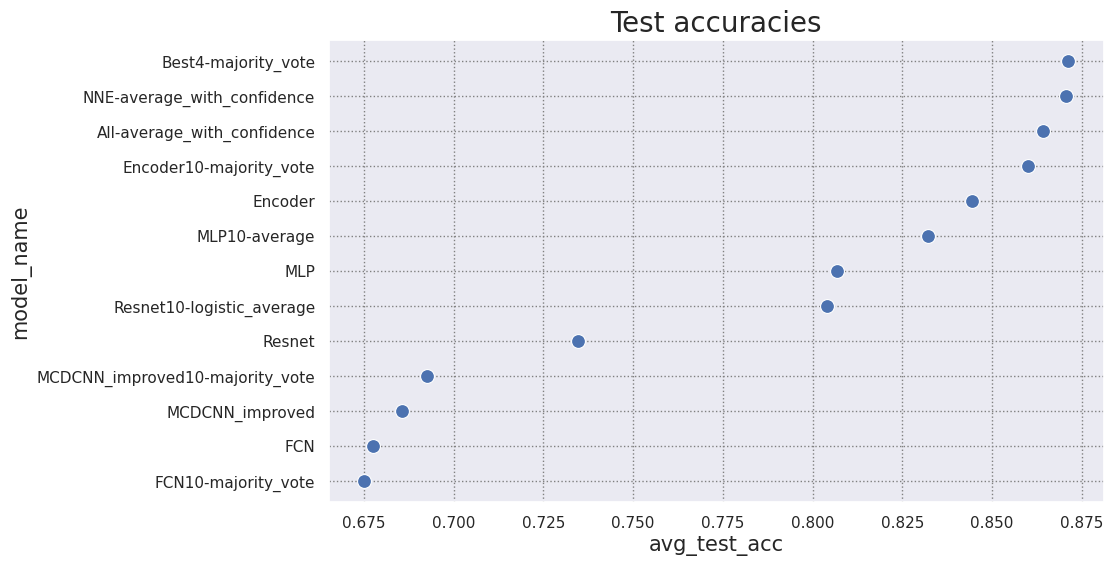

In [309]:
plot_accuracies_scatter_plot(df_best_ensemble_and_individual_model)

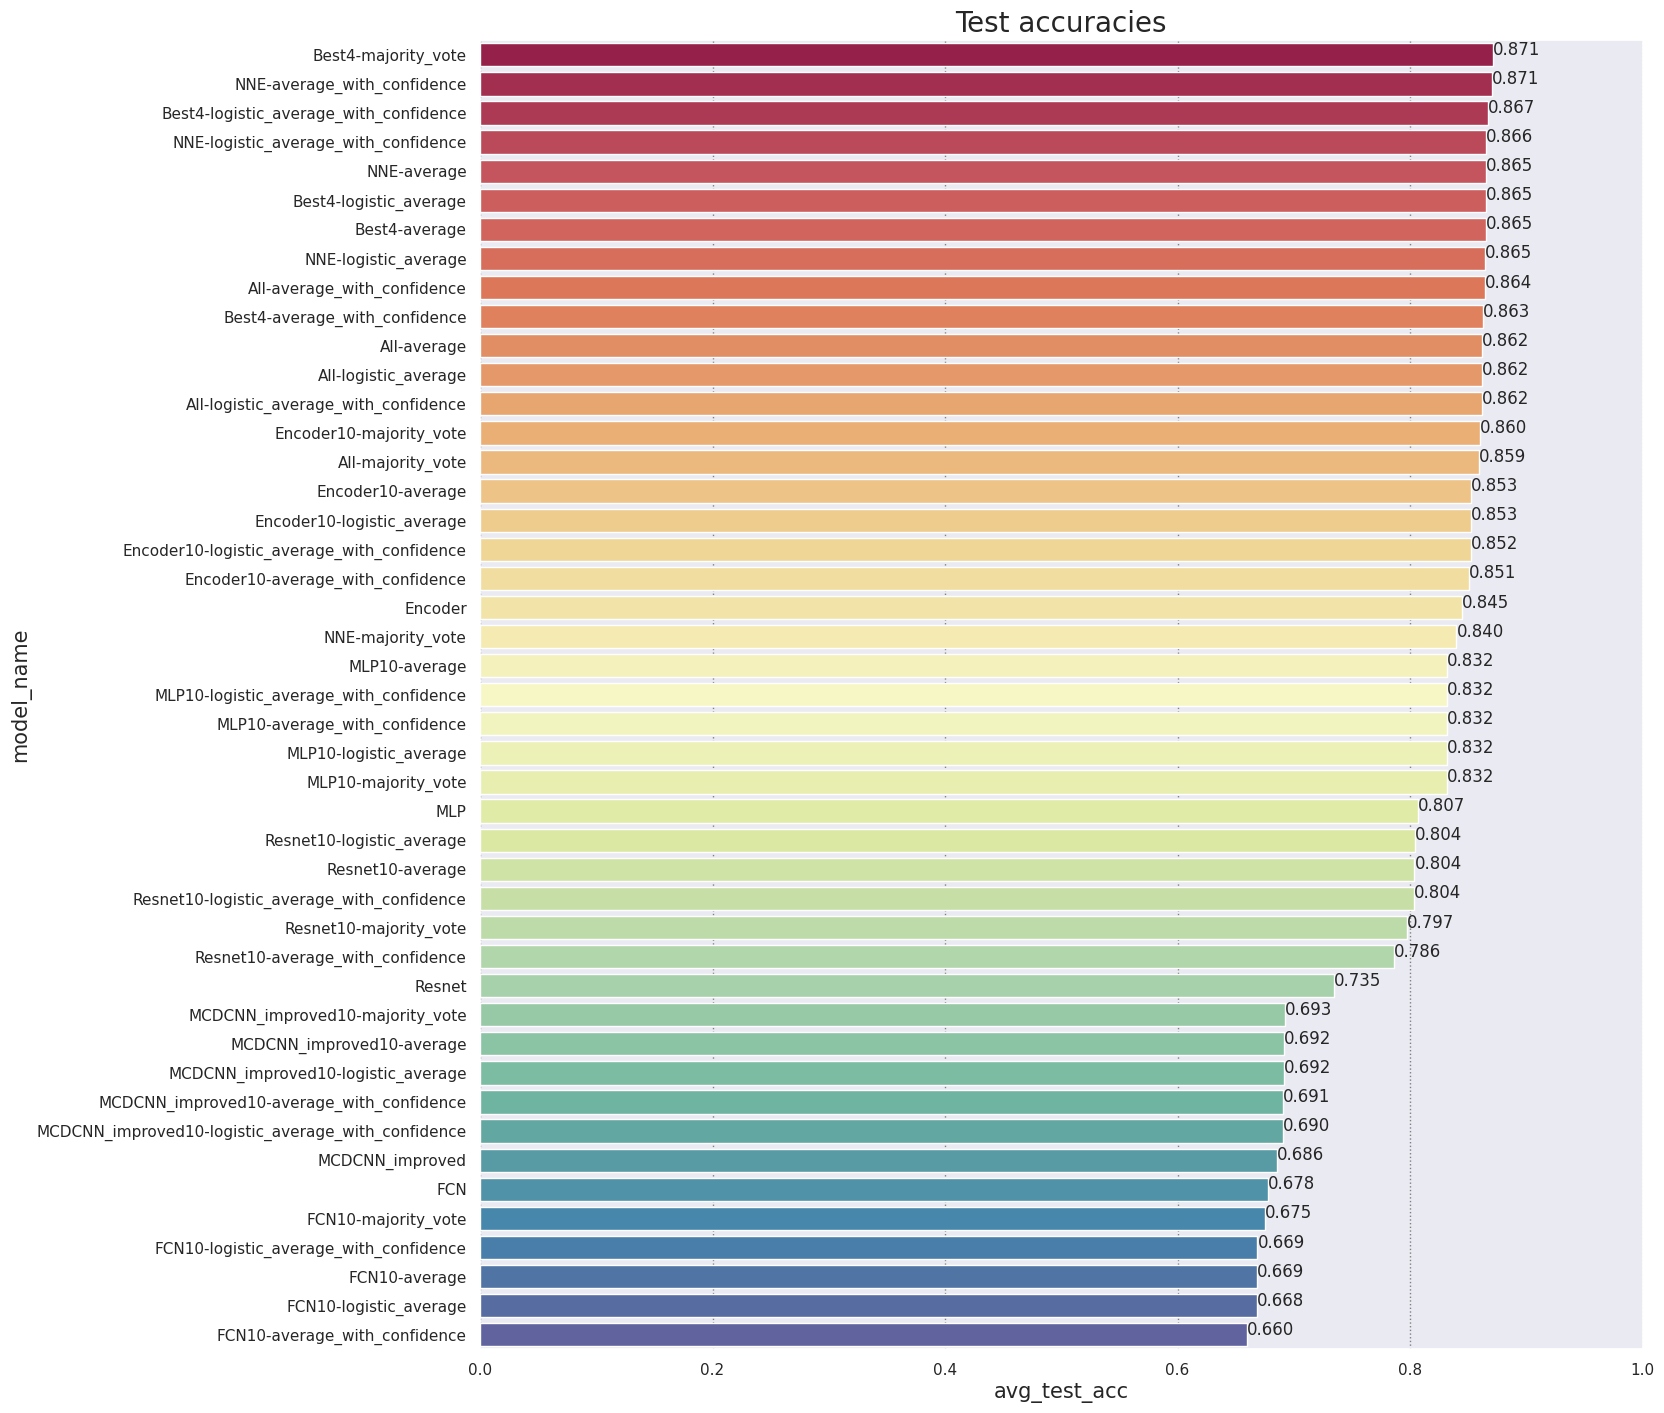

In [310]:
plot_accuracies_bar_plot(df_train_all_ensembles_mean, figsize = (15, 17))

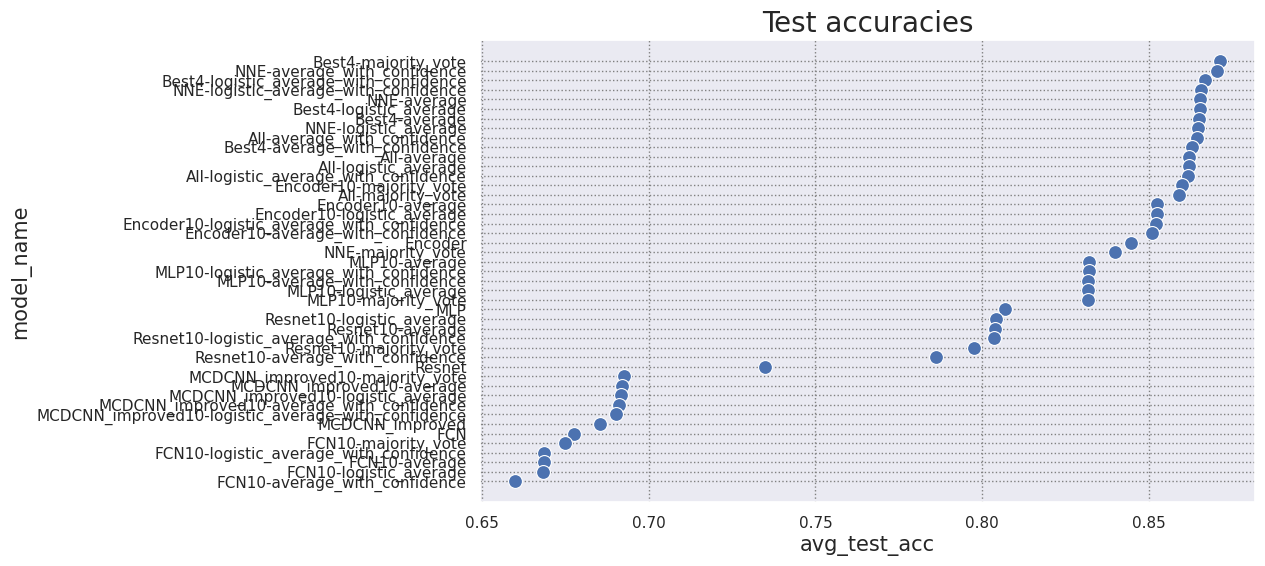

In [240]:
plot_accuracies_scatter_plot(df_train_all_ensembles_mean)

# Plot results for individual models

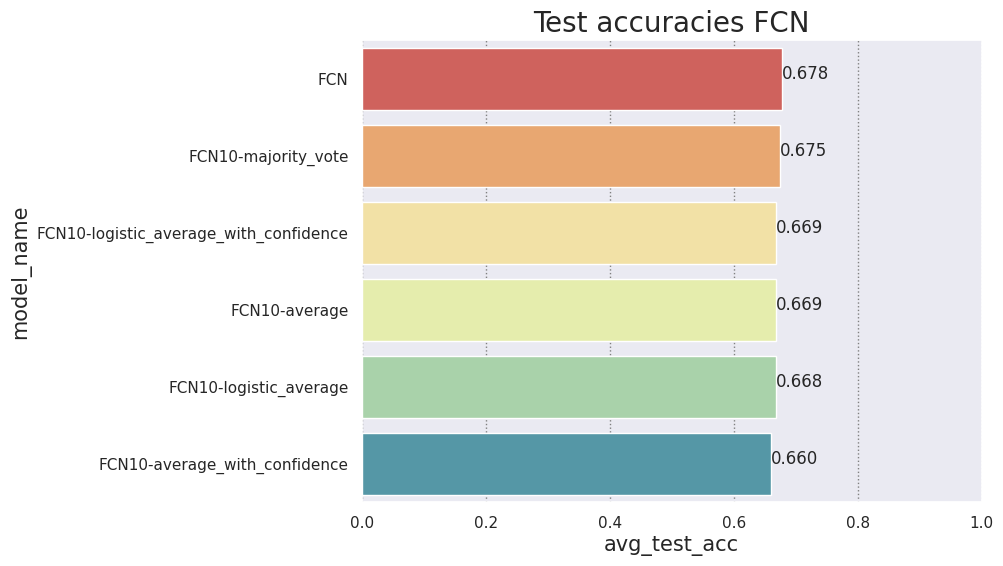

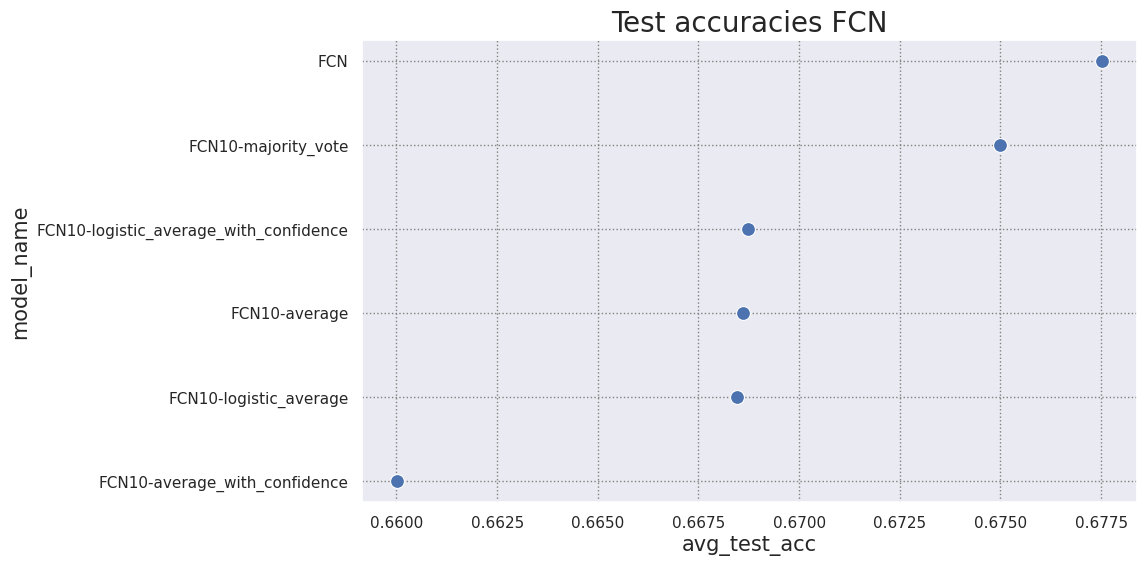

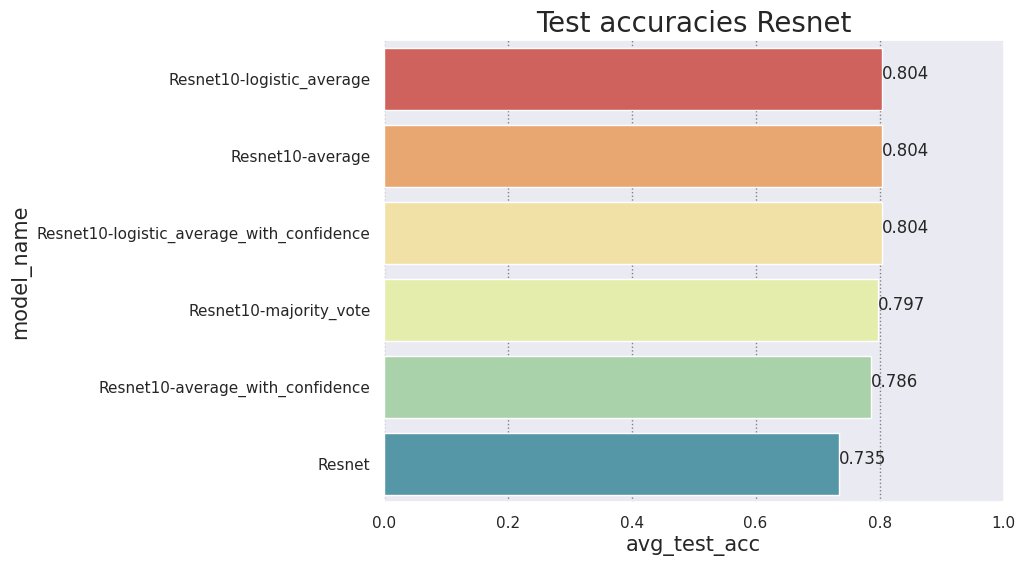

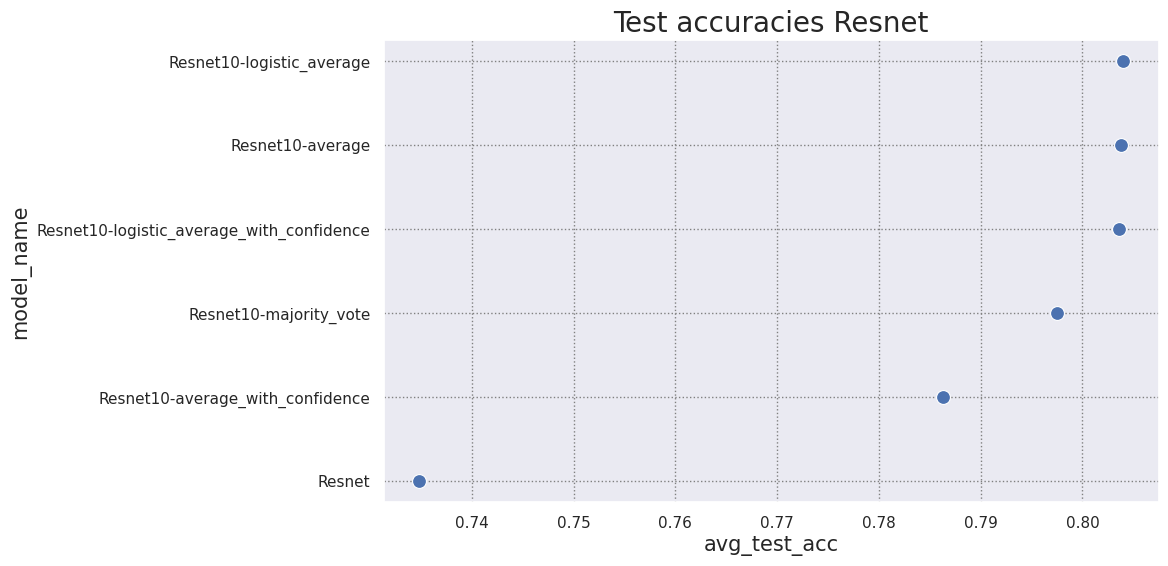

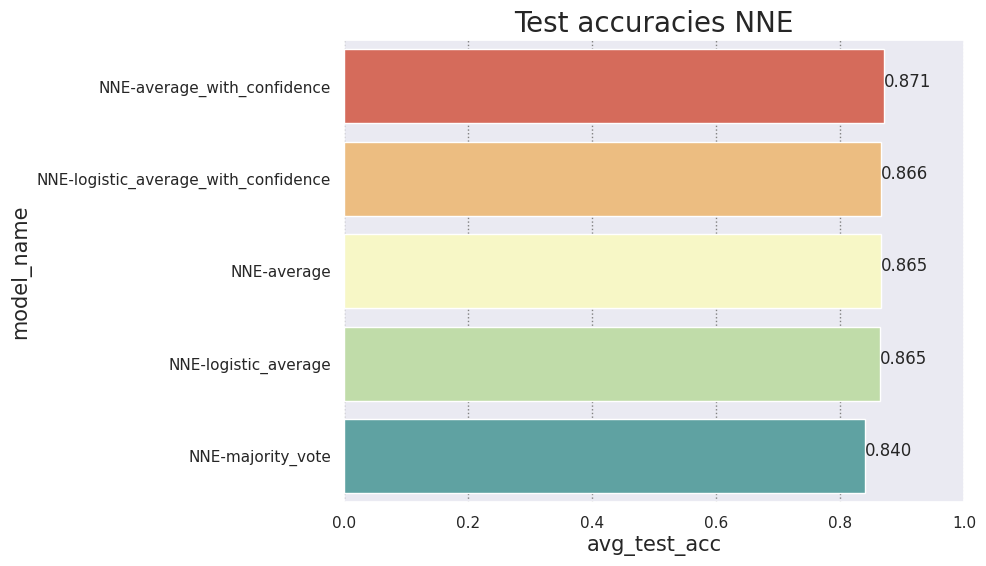

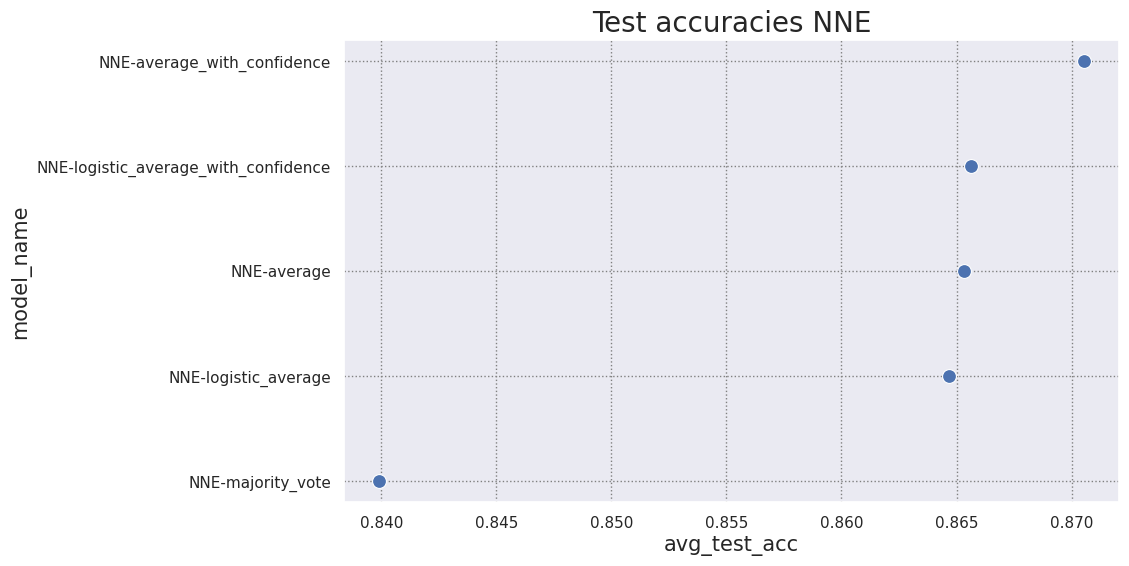

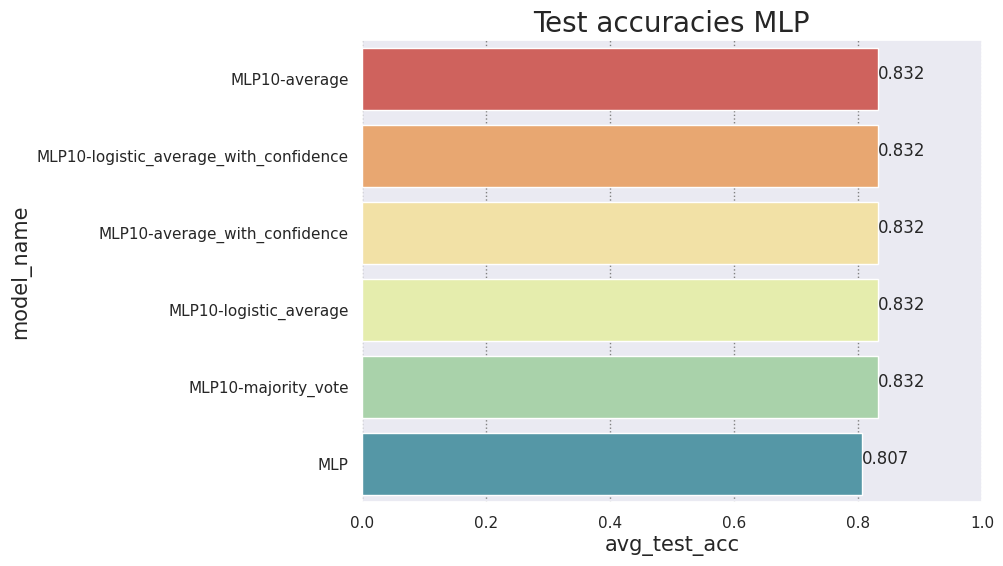

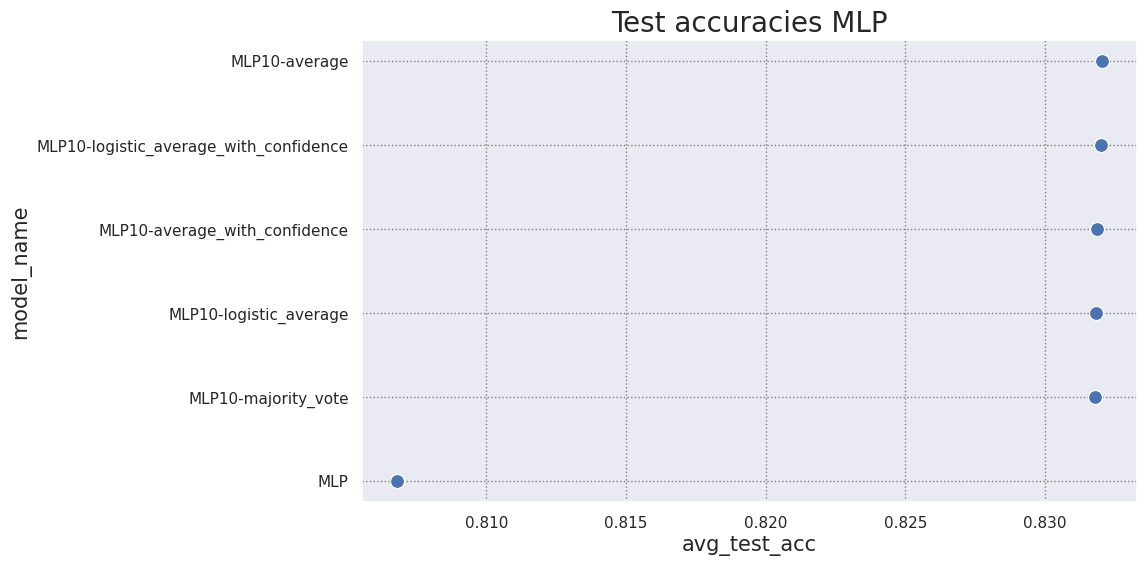

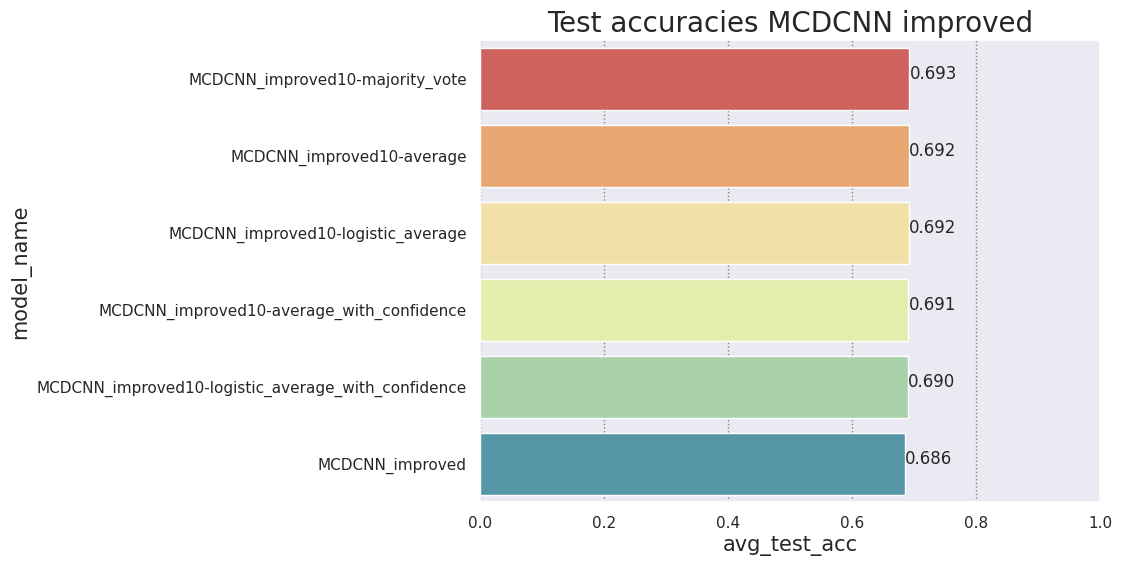

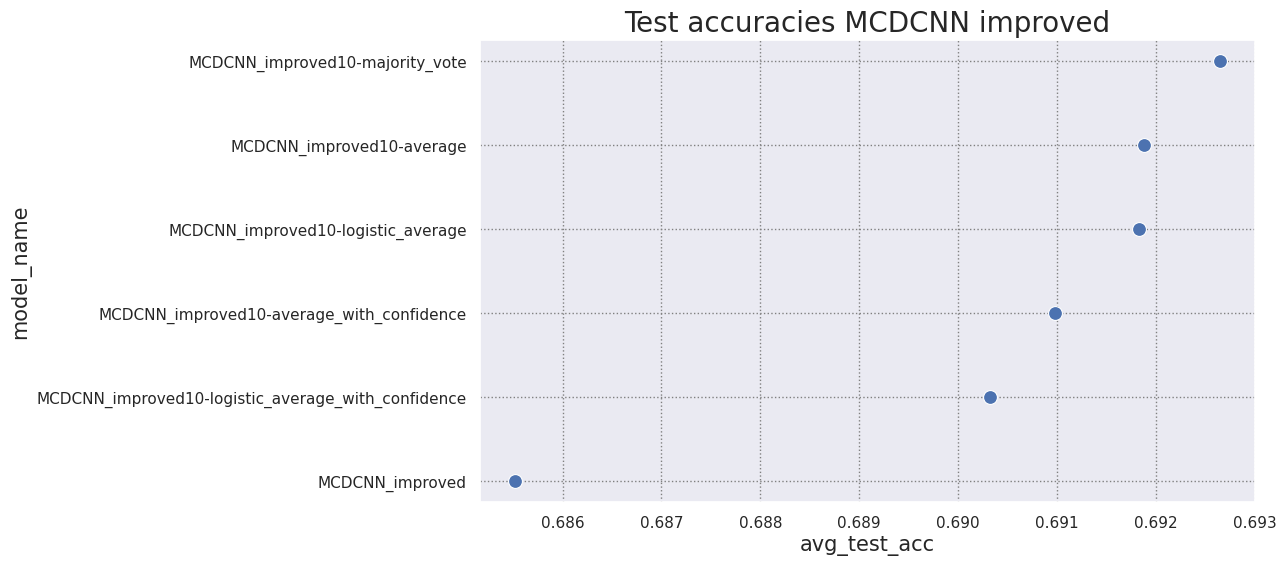

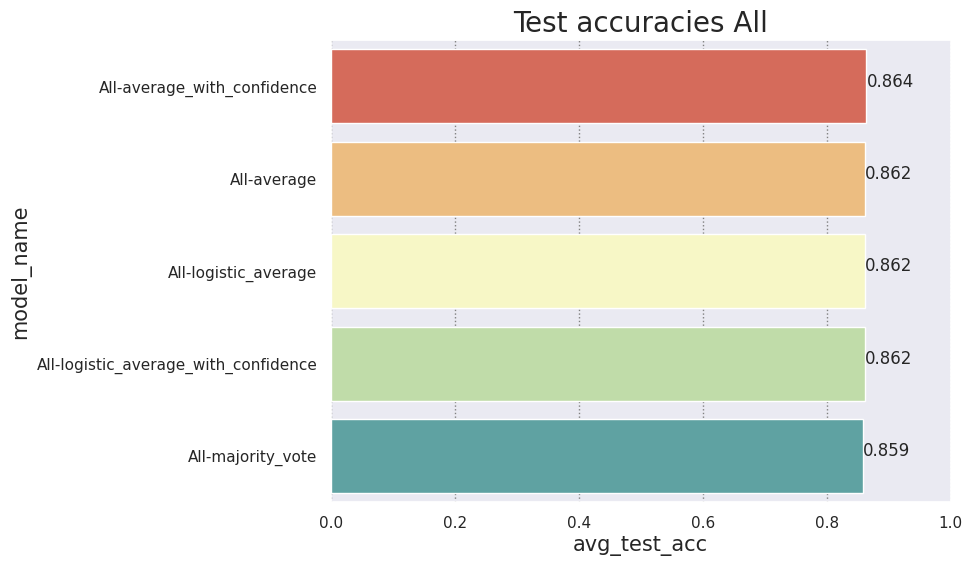

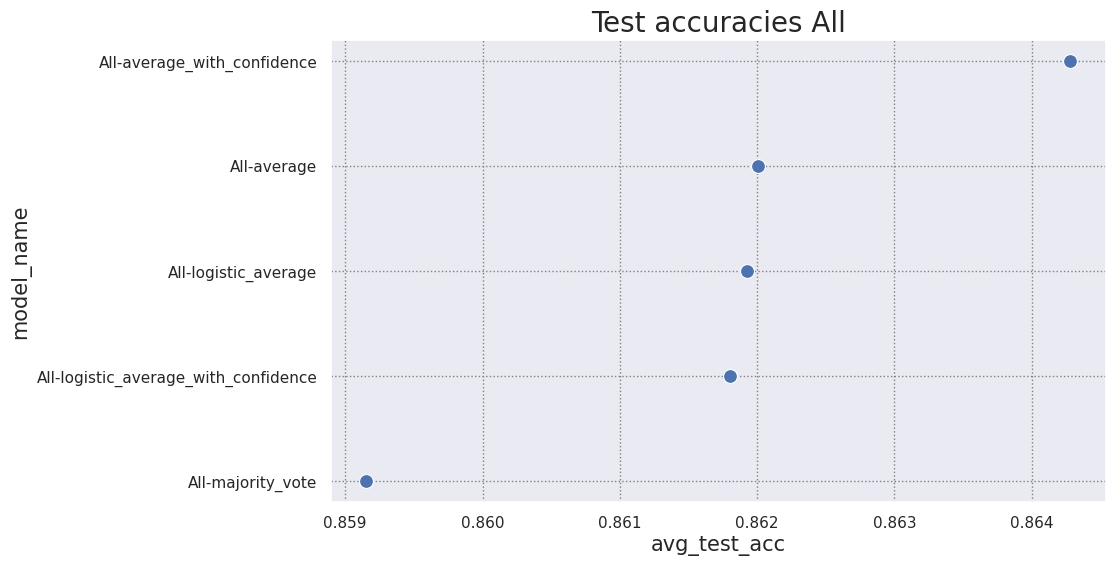

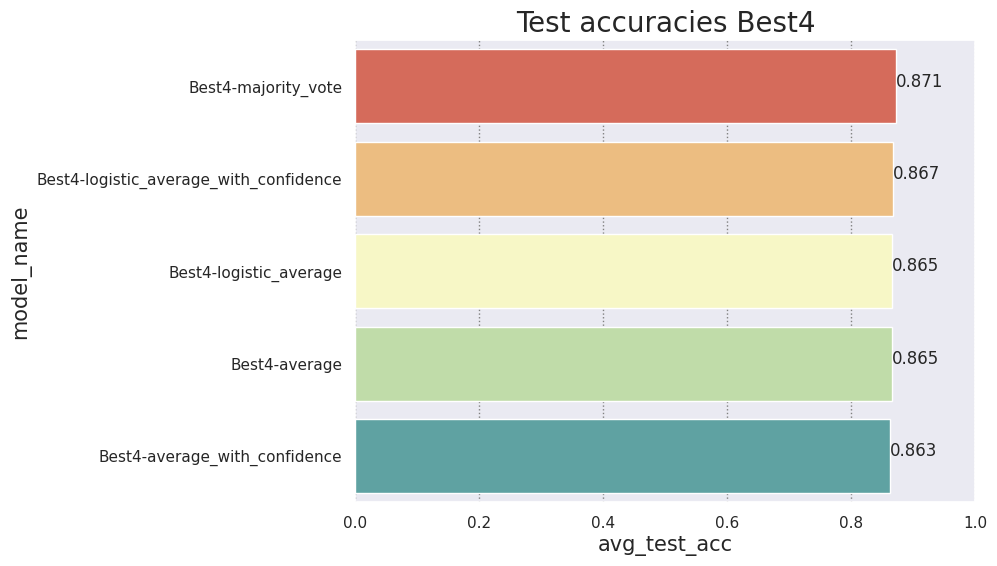

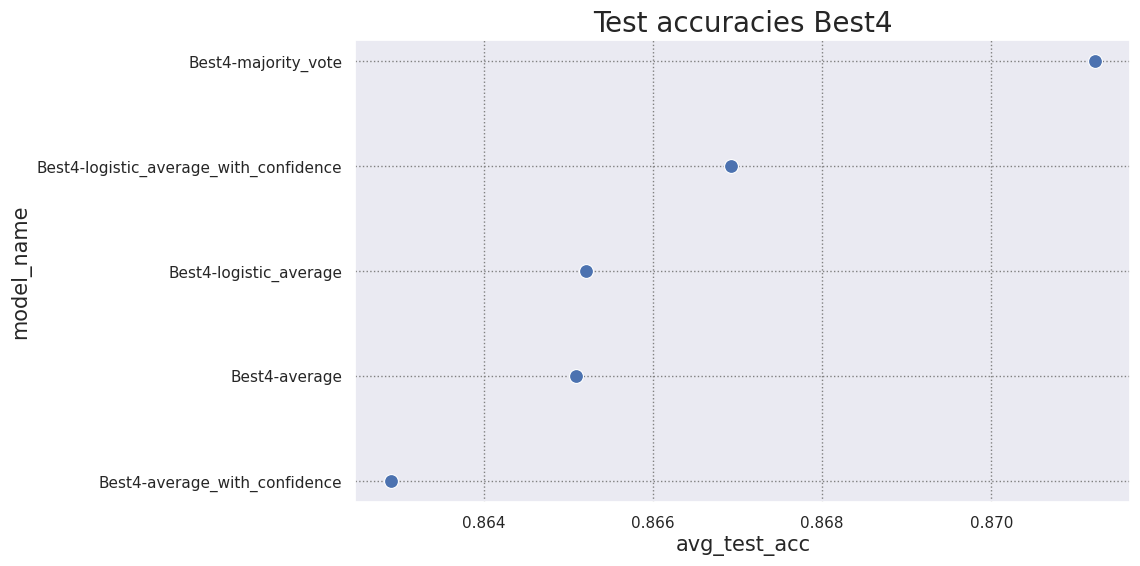

In [251]:
for df, title in zip([df_compare_fcn, df_compare_resnet, df_compare_nne, df_compare_mlp, df_compare_mcdcnn_improved, df_compare_all, df_compare_best4],\
                       ["Test accuracies FCN", "Test accuracies Resnet", "Test accuracies NNE", "Test accuracies MLP", "Test accuracies MCDCNN improved", "Test accuracies All", "Test accuracies Best4"]):
    plot_accuracies_bar_plot(df, title=title)
    plot_accuracies_scatter_plot(df, title=title)